In [1]:
require('tidyverse')
require('data.table')
require('rstan')
options(stringsAsFactors=FALSE)

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.1     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: data.table

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose

Loading required package: rstan
Loading required package: StanHeaders
rstan (Version 2.17.3, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Attaching packag

In [2]:
M2.DIR <- "../data/1020/m2/"

# read in all files
my_files <- list.files(M2.DIR, pattern="snps4_*")
m2_biomarkers <- sapply(my_files, function(x) strsplit(strsplit(x, "snps4_",fixed=TRUE)[[1]][[2]], ".txt")[[1]][[1]])


In [5]:
trait <- "Albumin"
load(sprintf("%s/f_m2_%s.RData", M2.DIR, trait))
summary(fit2)

source("../mixture_model_scripts/model_utils.R")
source("../mixture_model_scripts/snp_utils.R")

#getRgCorrect <- function(trait){
    load(sprintf("../data/1019/d3/m1/f_%s.RData", trait))
    p <- getPi(fit2)

   # fit_summ_R <- summary(fit1, pars=c("Omegacor"), probs=c(0.05, 0.50, 0.95))
   # rg <- matrix(fit_summ_R$pi[,c("50%")], ndim, ndim)
   # rg.val <- rg[upper.tri(rg, diag=FALSE)]
#    data.frame("trait"=trait, t(unlist(rg.val)))
#}
#rg_tab <- do.call(rbind, lapply(meno_df$trait, getRgCorrect))

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
pi[1],9.972253e-01,4.099835e-06,1.401462e-04,9.969560e-01,9.971298e-01,9.972283e-01,9.973201e-01,9.974885e-01,1168.5038,0.9998242
pi[2],3.115938e-06,8.076792e-08,3.230717e-06,8.061670e-08,8.199294e-07,2.108166e-06,4.370125e-06,1.167141e-05,1600.0000,0.9991161
pi[3],3.033431e-06,7.738156e-08,3.095262e-06,4.612320e-08,8.282967e-07,2.107490e-06,4.146241e-06,1.143347e-05,1600.0000,0.9992992
pi[4],2.768525e-03,4.107829e-06,1.401418e-04,2.502484e-03,2.675958e-03,2.765470e-03,2.863131e-03,3.036424e-03,1163.8872,0.9997293
sigmasq[1],7.797013e+00,2.414134e+00,6.508302e+01,2.632070e-01,7.008893e-01,1.410485e+00,3.336638e+00,4.326273e+01,726.7959,1.0017838
sigmasq[2],1.104297e+01,5.236638e+00,2.013980e+02,2.613416e-01,6.905320e-01,1.302112e+00,2.928748e+00,3.822655e+01,1479.1267,1.0002192
sigmasq[3],3.963794e-03,7.148783e-06,2.327027e-04,3.549481e-03,3.799263e-03,3.956317e-03,4.115856e-03,4.433474e-03,1059.5914,1.0000451
sigmasq[4],4.168399e-03,6.068500e-06,2.427400e-04,3.713950e-03,4.008919e-03,4.158923e-03,4.324782e-03,4.669229e-03,1600.0000,1.0005387
"Sigma[1,1,1]",0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1600.0000,NaN
"Sigma[1,1,2]",0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1600.0000,NaN


### grab M3 results 

In [63]:
require('tidyverse')
options(stringsAsFactors=FALSE)

In [1]:

MENO.DIR <- "../data/1019/d3/m1/"
summary_files <- list.files(MENO.DIR, pattern="summary*")
summary_files
length(summary_files)

meno_traits <- str_replace_all(summary_files, c("summary_dat_"="", "_3_.txt" =""))

meno_df <- do.call(rbind, lapply(summary_files, function(x) read.table(sprintf("%s/%s", MENO.DIR, x), sep=" ", header=TRUE)))
head(meno_df)

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.1     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] "summary_dat_Alanine_aminotransferase_3_.txt"       
 [2] "summary_dat_Albumin_3_.txt"                        
 [3] "summary_dat_Alkaline_phosphatase_3_.txt"           
 [4] "summary_dat_Apolipoprotein_A_3_.txt"               
 [5] "summary_dat_Apolipoprotein_B_3_.txt"               
 [6] "summary_dat_Apolipoprotein_B.adjust.statins_3_.txt"
 [7] "summary_dat_Aspartate_aminotransferase_3_.txt"     
 [8] "summary_dat_C_reactive_protein_3_.txt"             
 [9] "summary_dat_Calcium_3_.txt"                        
[10] "summary_dat_Cholesterol.adjust.statins_3_.txt"     
[11] "summary_dat_Creatinine_3_.txt"                     
[12] "summary_dat_Creatinine_in_urine_3_.txt"            
[13] "summary_dat_Cystatin_C_3_.txt"                     
[14] "summary_dat_Direct_bilirubin_3_.txt"               
[15] "summary_dat_eGFR_3_.txt"                           
[16] "summary_dat_Gamma_glutamyltransferase_3_.txt"      
[17] "summary_dat_Glucose_3_.txt"                        
[18] "summary_dat_Glycated_haemoglobin_HbA1c_3_.txt"     
[19] "summary_dat_HDL_cholesterol_3_.txt"                
[20] "summary_dat_IGF_1_3_.txt"                          
[21] "summary_dat_LDL_direct.adjust.statins_3_.txt"      
[22] "summary_dat_Lipoprotein_A_3_.txt"                  
[23] "summary_dat_Non_albumin_protein_3_.txt"            
[24] "summary_dat_Phosphate_3_.txt"                      
[25] "summary_dat_Potassium_in_urine_3_.txt"             
[26] "summary_dat_SHBG_3_.txt"                           
[27] "summary_dat_Sodium_in_urine_3_.txt"                
[28] "summary_dat_Testosterone_3_.txt"                   
[29] "summary_dat_Total_bilirubin_3_.txt"                
[30] "summary_dat_Total_protein_3_.txt"                  
[31] "summary_dat_Triglycerides_3_.txt"                  
[32] "summary_dat_Urate_3_.txt"                          
[33] "summary_dat_Urea_3_.txt"                           
[34] "summary_dat_Vitamin_D_3_.txt"

[1] 34

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V15,V16,Omegacor.1.2.,Omegacor.1.3.,Omegacor.2.3.,Omegacor.1.2..1,Omegacor.1.3..1,Omegacor.2.3..1,V23,V24
Alanine_aminotransferase,326111,0.9319638,0.068036187,0.0001089527,0.0001099727,0.0001025636,0.0001099727,0.0001156544,0.0001125128,⋯,0.8717186,0.9278855,0.9597647,0.8369641,0.9088695,0.9935363,0.9046926,0.9455862,NA,NA
Albumin,325078,0.9314347,0.068565277,0.0001176198,0.0001164353,0.0001130742,0.0001164353,0.0001222350,0.0001194584,⋯,0.9464726,0.9805575,0.9443273,0.9096069,0.9641333,0.9929576,0.9784959,0.9939114,NA,NA
Alkaline_phosphatase,326119,0.9776614,0.022338623,0.0010351222,0.0009569091,0.0010772879,0.0009569091,0.0009082301,0.0010140020,⋯,0.9833978,0.9881554,0.9798687,0.9772965,0.9846775,0.9930635,0.9889923,0.9915207,NA,NA
Apolipoprotein_A,324658,0.9721877,0.027812280,0.0005216977,0.0005323399,0.0005287087,0.0005323399,0.0005473502,0.0005431249,⋯,0.9730816,0.9758474,0.9912052,0.9626829,0.9689533,0.9992437,0.9825325,0.9819257,NA,NA
Apolipoprotein_B,325883,0.9927704,0.007229569,0.0039762534,0.0032335917,0.0027734306,0.0032335917,0.0026422980,0.0022669379,⋯,0.9833898,0.9860293,0.9951780,0.9782631,0.9821672,0.9993943,0.9874944,0.9894108,NA,NA
Apolipoprotein_B.adjust.statins,325938,0.9868003,0.013199700,0.0025137275,0.0024331669,0.0021970193,0.0024331669,0.0023634903,0.0021354926,⋯,0.9838716,0.9862294,0.9961970,0.9800476,0.9834471,0.9996392,0.9873768,0.9888099,NA,NA


In [2]:
cols_d3 <- c("trait", "n", "pi[1]", "pi[2]", 
"Sigma[1,1,1]", 
"Sigma[1,1,2]", 
"Sigma[1,2,1]",
"Sigma[1,2,2]", 
             
"Sigma[2,1,1]", 
"Sigma[2,1,2]", 
"Sigma[2,2,1]",
"Sigma[2,2,2]",
"miss",
"rg.1","rg.2","rg.3", "rgl.1","rgl.2","rgl.3", "rgu.1","rgu.2","rgu.3", "h1", "h2")

dim(meno_df)
length(cols_d3)
colnames(meno_df) <- cols_d3

[1] 34 24

[1] 24

In [3]:
meno_df <- meno_df %>% filter(trait != "Apolipoprotein_B") # remove the extra

In [8]:
ndim <- 3
require('rstan')
getRgCorrect <- function(trait){
    load(sprintf("../data/1019/d3/m1/f_%s.RData", trait))
    fit_summ_R <- summary(fit1, pars=c("Omegacor"), probs=c(0.05, 0.50, 0.95))
    rg <- matrix(fit_summ_R$summary[,c("50%")], ndim, ndim)
    rg.val <- rg[upper.tri(rg, diag=FALSE)]
    data.frame("trait"=trait, t(unlist(rg.val)))
}
rg_tab <- do.call(rbind, lapply(meno_df$trait, getRgCorrect))


In [15]:
colnames(rg_tab) <- c("trait", "rg.1", "rg.2", "rg.3")

In [19]:
meno_df2 <- full_join(rg_tab, meno_df %>% select(-rg.1,-rg.2,-rg.3))

genetic_corr <- meno_df2 %>% select("trait","rg.1","rg.2","rg.3", "rgl.1","rgl.2","rgl.3", "rgu.1","rgu.2","rgu.3") 
genetic_corr_long <- genetic_corr %>% gather(rg_type, value, -trait) %>% mutate(value=as.numeric(value))

gen_cor_df <- genetic_corr_long %>% separate(rg_type, c("int", "group"), sep="\\.") %>% spread(key="int", value="value") %>%
mutate(group=c("pre_vs_post", "pre_vs_men", "post_vs_men")[as.numeric(group)])


# write this out - but make it pretty
meno_df_reform <- meno_df %>% select("trait", "pi[2]", "rg.1", "rgl.1","rgu.1","rg.2","rgl.2","rgu.2","rg.3","rgl.3", "rgu.3") %>% 
mutate(trait=str_replace_all(trait, ".adjust.statins", "")) %>%
rename(rg.pre_post=rg.1, rg.pre_male=rg.2, rg.post_male=rg.3,
       rg.pre_post.l="rgl.1",
       rg.pre_male.l="rgl.2",
       rg.post_male.l="rgl.3", 
       rg.pre_post.u="rgu.1",
              rg.pre_male.u="rgu.2",
       rg.post_male.u="rgu.3"
      )


Joining, by = "trait"


In [20]:
meno_df_reform %>% write_csv("../data/aggreg_1020/m1_menopause_results.csv")

### Train/valid split

In [64]:
df_t_train <- read.table("../data/1021/m2/snps4_Testosterone.txt", sep=" ", header=TRUE); 
head(df_t_train)

SNP,CHR,B.f,B.m,SE.f,SE.m,P.f,P.m,p1,p2,p3,p4,category,gene
Affx-13930511,17,-0.00568127,0.0341612,2.932363e-05,2.876520e-05,0.294113000,1.90562e-10,7.249140e-06,2.320688e-10,0.9999670,2.572732e-05,3,KANSL1
Affx-14343876,17,-0.01072490,-0.1504340,1.460496e-04,1.412532e-04,0.374838000,1.08414e-36,3.453609e-31,2.099696e-35,0.9995204,4.796110e-04,3,NLGN2
Affx-19716376,22,0.00652395,0.0439917,3.685048e-05,3.578097e-05,0.282510000,1.93292e-13,8.213882e-09,3.027546e-13,0.9999678,3.222230e-05,3,PNPLA3
Affx-20432062,2,-0.00827187,-0.0480683,8.238467e-05,7.997761e-05,0.362119000,7.67709e-08,1.695945e-03,7.933290e-08,0.9982613,4.268350e-05,3,PCYOX1
Affx-24849994,4,0.00735717,0.0426173,3.827018e-05,3.691364e-05,0.234336000,2.32315e-12,9.178102e-08,3.923644e-12,0.9999630,3.690684e-05,3,NA
Affx-36290529,2,0.03264220,0.0582062,9.193109e-05,9.073763e-05,0.000663204,9.96902e-10,2.597477e-05,2.718309e-07,0.9891115,1.086229e-02,3,SLC5A6


In [65]:
m_train <- df_t_train %>% filter(category==3) %>% select( -p1, -p2, -p4, -category) %>% rename(post=p3, ID=SNP)
f_train <- df_t_train %>% filter(category==2) %>% select( -p1, -p3, -p4, -category)%>% rename(post=p2, ID=SNP)

In [66]:
m_v <- read_tsv("../gwas1021/ukb24983_v2_hg19.Testosterone_onesex_valid.genotyped.glm.linear")  
f_v <- read_tsv("../gwas1021/ukb24983_v2_hg19.Testosterone_zerosex_valid.genotyped.glm.linear") 

Parsed with column specification:
cols(
  `#CHROM` = col_character(),
  POS = col_integer(),
  ID = col_character(),
  REF = col_character(),
  ALT = col_character(),
  A1 = col_character(),
  TEST = col_character(),
  OBS_CT = col_integer(),
  BETA = col_double(),
  SE = col_double(),
  T_STAT = col_double(),
  P = col_double()
)
Parsed with column specification:
cols(
  `#CHROM` = col_character(),
  POS = col_integer(),
  ID = col_character(),
  REF = col_character(),
  ALT = col_character(),
  A1 = col_character(),
  TEST = col_character(),
  OBS_CT = col_integer(),
  BETA = col_double(),
  SE = col_double(),
  T_STAT = col_double(),
  P = col_double()
)


In [67]:
table(f_v$ID==m_v$ID)
test_valid <- cbind( (f_v %>% select(`#CHROM`, BETA, SE, P) %>% rename(CHR=`#CHROM`, B.f=BETA, SE.f=SE, P.f=P)),
    (m_v %>% select(ID, POS, REF, ALT, BETA, SE, P) %>% rename(B.m=BETA, SE.m=SE, P.m=P))) 


  TRUE 
804470 

[1] rs10402760  rs10462021  rs10981228  rs11090865  rs111643567 rs111806580
 [7] rs114289298 rs114469043 rs115310850 rs11557154  rs11672691  rs11673980 
[13] rs116740237 rs11685443  rs117006308 rs117327231 rs11761528  rs11769461 
[19] rs117722415 rs12654812  rs12956893  rs12999558  rs13222543  rs149048452
[25] rs149995364 rs151058099 rs16933604  rs17234724  rs17277546  rs17713514 
[31] rs1771744   rs17741481  rs17807329  rs17853284  rs1794192   rs1886861  
[37] rs199510068 rs2280558   rs28399993  rs3025144   rs333193    rs34500961 
[43] rs34904907  rs35008345  rs35209863  rs35917528  rs36221133  rs3737576  
[49] rs3781931   rs396763    rs4270939   rs45446698  rs55839709  rs55991135 
[55] rs56087817  rs6020423   rs62025138  rs62259233  rs62395369  rs6720394  
[61] rs71556711  rs7246440   rs7251022   rs72933716  rs72961013  rs73148819 
[67] rs73245852  rs74647966  rs74675346  rs74675440  rs7532171   rs77297149 
[73] rs7770976   rs7780066   rs78635447  rs78865787  rs79214787  rs80045428 
[79] rs8023143   rs9285177   rs9387621   rs9552597   rs9928591  
462 Levels: Affx-13930511 Affx-14343876 Affx-19716376 ... rs9928591

In [95]:
test_valid_filt <- test_valid %>% filter(ID %in% c(f_train$ID, m_train$ID)) %>% 
mutate(sex=ifelse(ID %in% f_train$ID, "female", "male"), dataset="validation")


In [75]:
test_valid_filt %>% head()

CHR,B.f,SE.f,P.f,ID,POS,REF,ALT,B.m,SE.m,P.m,sex,dataset
X,-0.00306682,0.01513560,0.839431,rs145544127,8635709,C,G,0.0513002,0.01058950,1.27412e-06,male,validation
X,0.00336110,0.00708616,0.635275,rs5978940,8649206,C,A,0.0112252,0.00494588,2.32364e-02,male,validation
X,0.00465716,0.01611260,0.772554,rs144870676,8673347,G,A,-0.0524000,0.01101850,1.98432e-06,male,validation
X,0.01996940,0.01313810,0.128529,rs5933682,8783803,A,G,0.0834745,0.00914662,7.38388e-20,male,validation
X,-0.01262990,0.01617920,0.435028,rs146177574,8825403,A,G,-0.0640836,0.01116760,9.62423e-09,male,validation
X,-0.00342167,0.01260100,0.785978,rs149537093,8825820,C,T,0.0268740,0.00896753,2.72976e-03,male,validation


In [96]:
colnames(test_valid_filt)
test_valid_filt2 <- test_valid_filt %>% select(-POS, -REF, -ALT)
test_disc <- rbind(f_train %>% mutate(sex="female"), m_train %>% mutate(sex="male")) %>% mutate(dataset="discovery")
colnames(test_disc)


[1] "CHR"     "B.f"     "SE.f"    "P.f"     "ID"      "POS"     "REF"    
 [8] "ALT"     "B.m"     "SE.m"    "P.m"     "sex"     "dataset"

[1] "ID"      "CHR"     "B.f"     "B.m"     "SE.f"    "SE.m"    "P.f"    
 [8] "P.m"     "post"    "gene"    "sex"     "dataset"

In [77]:
comb_test <- rbind(test_disc %>% select(colnames(test_valid_filt2)), test_valid_filt2)

In [78]:
comb_test %>% head()
nrow(comb_test)

CHR,B.f,SE.f,P.f,ID,B.m,SE.m,P.m,sex,dataset
19,-0.0509194,8.347015e-05,2.50500e-08,rs10402760,0.01429760,7.881835e-05,0.107300,female,discovery
1,-0.0268895,3.203651e-05,2.02973e-06,rs10462021,0.00737012,3.103704e-05,0.185864,female,discovery
9,-0.0403342,6.607836e-05,6.99536e-07,rs10981228,0.00742876,6.367082e-05,0.351860,female,discovery
22,-0.0359148,5.397180e-05,1.01683e-06,rs11090865,0.00481898,5.275712e-05,0.507038,female,discovery
7,-0.2648840,7.159478e-04,4.28626e-23,rs111643567,0.00419595,6.438653e-04,0.868660,female,discovery
11,0.0670115,9.050345e-05,1.88061e-12,rs111806580,0.01289900,8.804838e-05,0.169240,female,discovery


[1] 908

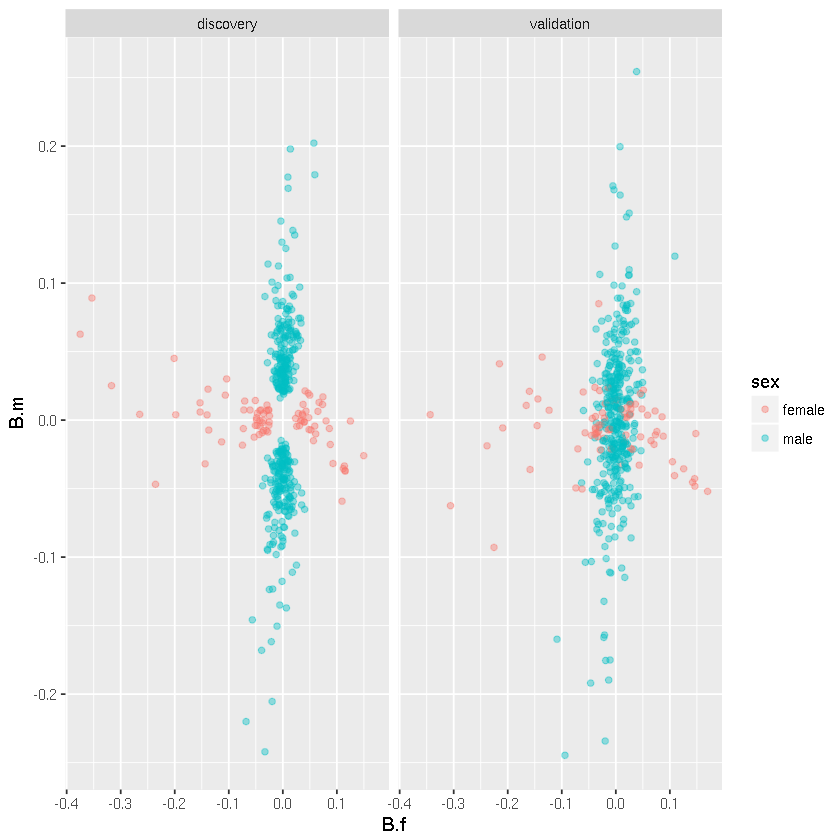

In [79]:
ggplot(comb_test, aes(x=B.f, y=B.m, color=sex))+geom_point(alpha=0.4)+facet_wrap(~dataset)


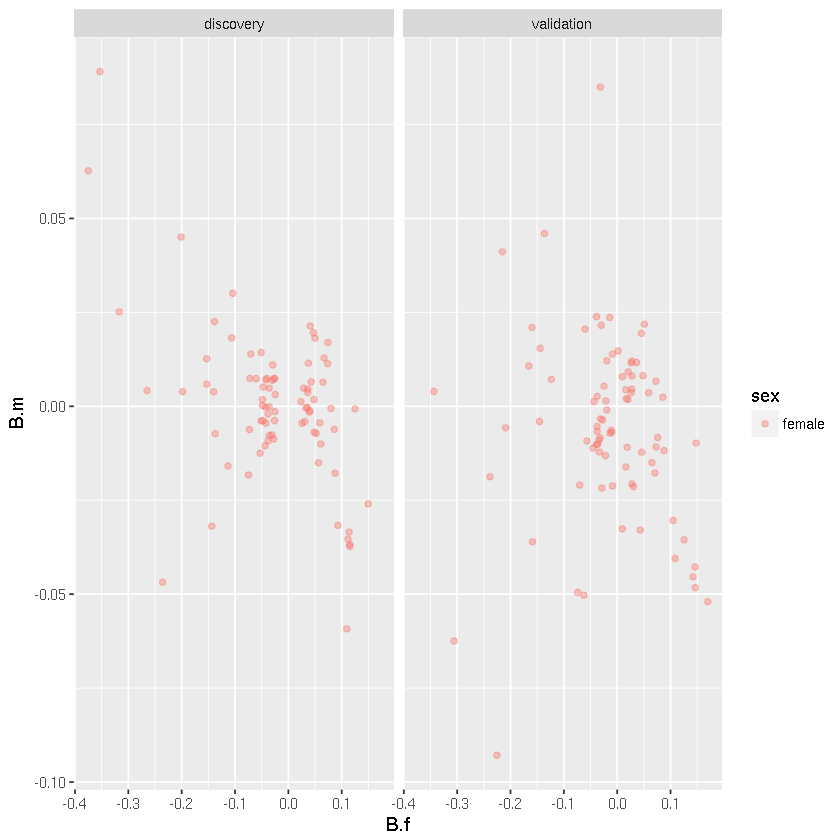

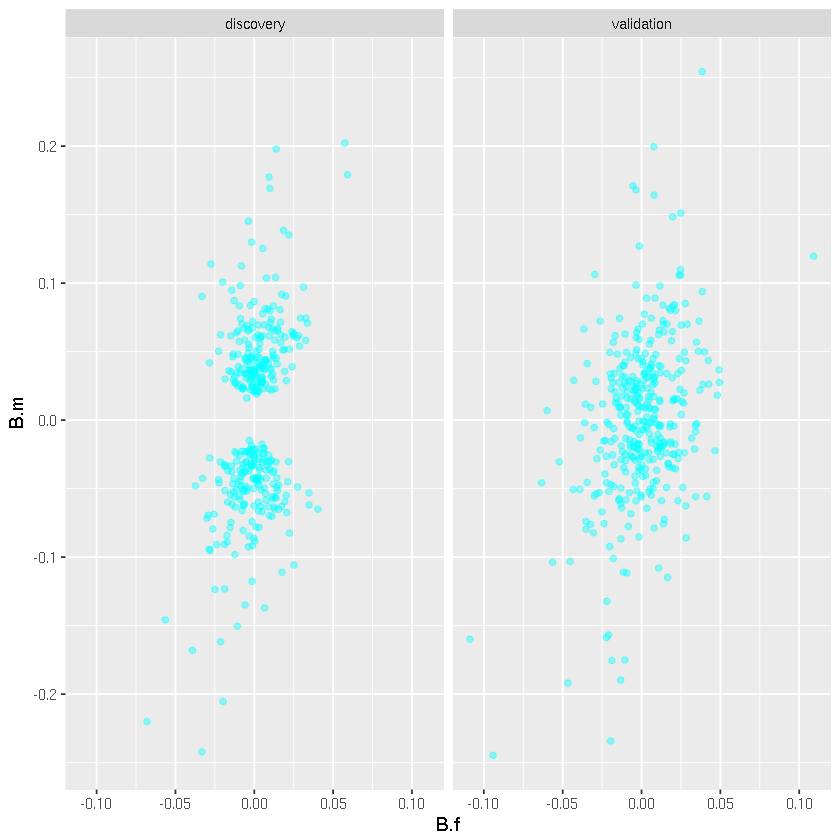

In [80]:
ggplot(comb_test %>% filter(sex=="female"), aes(x=B.f, y=B.m, color=sex))+geom_point(alpha=0.4)+facet_wrap(~dataset)
ggplot(comb_test %>% filter(sex=="male"), aes(x=B.f, y=B.m))+geom_point(alpha=0.4, color="cyan")+facet_wrap(~dataset)

In [102]:
test_valid_filt3 <- test_valid_filt2 %>% 
rename(B.f.v=B.f, B.m.v=B.m, SE.f.v=SE.f, SE.m.v=SE.m, P.f.v=P.f, P.m.v=P.m) %>% 
select(-dataset) 

train_valid_compare <- full_join(test_disc %>% select(-sex, -dataset), test_valid_filt3 %>% select( -CHR), by="ID")

head(train_valid_compare)

ID,CHR,B.f,B.m,SE.f,SE.m,P.f,P.m,post,gene,B.f.v,SE.f.v,P.f.v,B.m.v,SE.m.v,P.m.v,sex
rs10402760,19,-0.0509194,0.01429760,8.347015e-05,7.881835e-05,2.50500e-08,0.107300,0.9927898,ICAM5,-0.0248608,0.01381870,7.20154e-02,0.00535496,0.01352140,0.6920810,female
rs10462021,1,-0.0268895,0.00737012,3.203651e-05,3.103704e-05,2.02973e-06,0.185864,0.6013678,PER3,-0.0299966,0.00861343,4.97192e-04,0.02155390,0.00849801,0.0112049,female
rs10981228,9,-0.0403342,0.00742876,6.607836e-05,6.367082e-05,6.99536e-07,0.351860,0.8549612,SUSD1,-0.0376331,0.01231300,2.24185e-03,-0.00672640,0.01239280,0.5872940,female
rs11090865,22,-0.0359148,0.00481898,5.397180e-05,5.275712e-05,1.01683e-06,0.507038,0.7895564,TRMU,-0.0376029,0.01115510,7.49807e-04,0.00262820,0.01100650,0.8112730,female
rs111643567,7,-0.2648840,0.00419595,7.159478e-04,6.438653e-04,4.28626e-23,0.868660,0.9962664,MYH16,-0.2153350,0.04302660,5.61761e-07,0.04112360,0.03867470,0.2876420,female
rs111806580,11,0.0670115,0.01289900,9.050345e-05,8.804838e-05,1.88061e-12,0.169240,0.9991443,SLC22A10,0.0726744,0.01453310,5.73798e-07,0.00664960,0.01447600,0.6459820,female


In [103]:
m_snps <- train_valid_compare %>% filter(sex=="male")
f_snps <- train_valid_compare %>% filter(sex=="female")
nrow(m_snps)
nrow(f_snps)

cutoff.p <- 0.05/nrow(test_valid_filt)
m_snps %>% filter(P.f.v < P.m.v) %>% count() # 75
f_snps %>% filter(P.f.v  > P.m.v) %>% count() # 7

m_snps %>% filter(B.m.v*B.m<0) %>% count() # 32
f_snps %>% filter(B.f.v*B.f<0) %>% count() # 4 

[1] 371

[1] 83

n
75


n
7


n
32


n
4


In [104]:
m_snps %>% filter(B.m.v*B.m<0)

ID,CHR,B.f,B.m,SE.f,SE.m,P.f,P.m,post,gene,B.f.v,SE.f.v,P.f.v,B.m.v,SE.m.v,P.m.v,sex
rs115635421,3,-2.28931e-04,-0.0860202,4.406011e-04,4.424460e-04,0.99129800,4.32624e-05,0.6496488,GALNT15,-0.05990770,0.03286540,0.0683374,0.00698216,0.03304180,0.8326440,male
rs116456980,1,-2.86101e-02,-0.0942236,5.048065e-04,4.903169e-04,0.20288800,2.09036e-05,0.7710298,NBPF3,0.00842798,0.03492750,0.8093240,0.03168640,0.03390750,0.3500530,male
rs116686169,2,1.23929e-03,-0.0780821,4.087877e-04,3.913473e-04,0.95112400,7.91782e-05,0.5284102,NA,-0.01335570,0.02990150,0.6551240,0.00965727,0.03024740,0.7495190,male
rs11704936,22,5.02628e-03,0.0392567,9.055768e-05,8.777235e-05,0.59737300,2.78941e-05,0.6986904,UPB1,-0.00610119,0.01452650,0.6744840,-0.00580787,0.01447580,0.6882650,male
rs117083642,7,-1.48210e-02,-0.0746064,2.939305e-04,2.936768e-04,0.38732700,1.34092e-05,0.8467507,NA,-0.02468040,0.02585910,0.3398770,0.01177080,0.02618240,0.6530220,male
rs13016086,2,4.60523e-03,0.0311449,4.789567e-05,4.763871e-05,0.50577600,6.41706e-06,0.8810895,BRE,0.00917254,0.01060550,0.3871060,-0.00248329,0.01054460,0.8138200,male
rs17575184,1,1.23985e-03,0.0279701,4.410182e-05,4.295728e-05,0.85189700,1.97830e-05,0.7103716,NEGR1,0.00102060,0.01021640,0.9204250,-0.00705197,0.01003500,0.4822250,male
rs1860284,17,2.98082e-03,-0.0284647,4.929781e-05,4.719731e-05,0.67117100,3.42600e-05,0.6031214,NTN1,-0.00147503,0.01063610,0.8897020,0.02020530,0.01059270,0.0564650,male
rs28617259,17,-1.84531e-02,0.0300227,5.044238e-05,4.864379e-05,0.00937287,1.67419e-05,0.7507405,RPTOR,-0.00749268,0.01094790,0.4937290,-0.01447680,0.01074430,0.1778600,male
rs302359,12,-1.41206e-03,-0.0740056,3.538424e-04,3.531468e-04,0.94016200,8.21815e-05,0.5224536,TMTC1,0.04809810,0.02877850,0.0946656,0.01818670,0.02786580,0.5139840,male


In [135]:
f_rep <- f_snps %>% filter(P.f.v < 10**-2) # 186

m_rep <- m_snps %>% filter(P.m.v < 10**-2) # 54




f_snps %>% filter(P.f.v < 0.05/(371+83)) %>% count() # 27

 m_snps %>% filter(P.m.v < 0.05/(371+83)) %>% count() # 100

n
27


n
100


In [106]:
m_rep  %>% arrange(P.f.v) %>% head()
m_rep  %>% arrange(P.m.v) %>% head()

#f_rep %>% head()



ID,CHR,B.f,B.m,SE.f,SE.m,P.f,P.m,post,gene,B.f.v,SE.f.v,P.f.v,B.m.v,SE.m.v,P.m.v,sex
rs11856795,15,-0.01454130,-0.0333074,6.083782e-05,5.961631e-05,0.062281600,1.60634e-05,0.7723862,WDR76,-0.0433761,0.01205860,0.000322142,-0.0506696,0.01171670,1.53170e-05,male
rs4968200,17,-0.00326793,-0.0846412,4.117930e-05,4.079377e-05,0.610577000,4.73603e-40,0.9999617,TNFSF12,-0.0323624,0.00985916,0.001029860,-0.0760369,0.00976126,6.86722e-15,male
rs11078697,17,-0.03314630,-0.2420460,3.799498e-04,3.641914e-04,0.089042600,7.79754e-37,0.9291406,SENP3,-0.0941169,0.02987980,0.001634640,-0.2446670,0.02926440,6.42318e-17,male
rs1042522,17,0.01853080,0.1384650,2.711639e-05,2.589527e-05,0.000373035,1.88864e-162,0.9464584,TP53,0.0248501,0.00797919,0.001844670,0.1510870,0.00777010,7.34440e-84,male
rs4149081,12,0.02031050,-0.0549452,3.755986e-05,3.631147e-05,0.000919871,7.77497e-20,0.9950466,SLCO1B1,0.0280659,0.00932417,0.002613840,-0.0625460,0.00923717,1.29418e-11,male
rs62062590,17,0.00535758,0.0776287,2.367260e-05,2.309764e-05,0.270835000,1.29108e-58,0.9999586,EFNB3,0.0209309,0.00747289,0.005098170,0.0842711,0.00733198,1.57183e-30,male


ID,CHR,B.f,B.m,SE.f,SE.m,P.f,P.m,post,gene,B.f.v,SE.f.v,P.f.v,B.m.v,SE.m.v,P.m.v,sex
rs1042522,17,0.01853080,0.1384650,2.711639e-05,2.589527e-05,0.000373035,1.88864e-162,0.9464584,TP53,0.02485010,0.00797919,0.00184467,0.1510870,0.00777010,7.34440e-84,male
rs12051767,17,-0.01982550,-0.2053620,8.566187e-05,8.123056e-05,0.032191600,1.23386e-114,0.9799316,SHBG,-0.01958980,0.01411620,0.16521900,-0.2342350,0.01362750,5.35255e-66,male
rs55784804,17,-0.02132540,-0.1617150,5.576505e-05,5.438709e-05,0.004294710,2.46735e-106,0.9824261,SHBG,-0.01881530,0.01159820,0.10475400,-0.1754500,0.01121830,5.52290e-55,male
rs3803800,17,-0.00171711,0.1298310,3.026683e-05,2.926345e-05,0.754954000,6.22838e-127,0.9999132,TNFSF12-TNFSF13,-0.00139194,0.00844594,0.86909700,0.1270370,0.00829511,8.38280e-53,male
rs62062590,17,0.00535758,0.0776287,2.367260e-05,2.309764e-05,0.270835000,1.29108e-58,0.9999586,EFNB3,0.02093090,0.00747289,0.00509817,0.0842711,0.00733198,1.57183e-30,male
rs113017476,2,0.01395530,0.1978790,1.337145e-04,1.270693e-04,0.227497000,6.99707e-69,0.9962859,NA,0.00775611,0.01743670,0.65645600,0.1995810,0.01748140,3.80484e-30,male


In [114]:

colnames(comb_test)
f <- comb_test %>% select(ID, B.f, SE.f, P.f, sex, dataset) %>% mutate(beta="f") %>% rename(B=B.f, SE=SE.f, P=P.f)
m <- comb_test %>% select(ID, B.m, SE.m, P.m, sex, dataset) %>% mutate(beta="m") %>% rename(B=B.m, SE=SE.m, P=P.m)
res <- rbind(f, m)

[1] "CHR"     "B.f"     "SE.f"    "P.f"     "ID"      "B.m"     "SE.m"   
 [8] "P.m"     "sex"     "dataset"

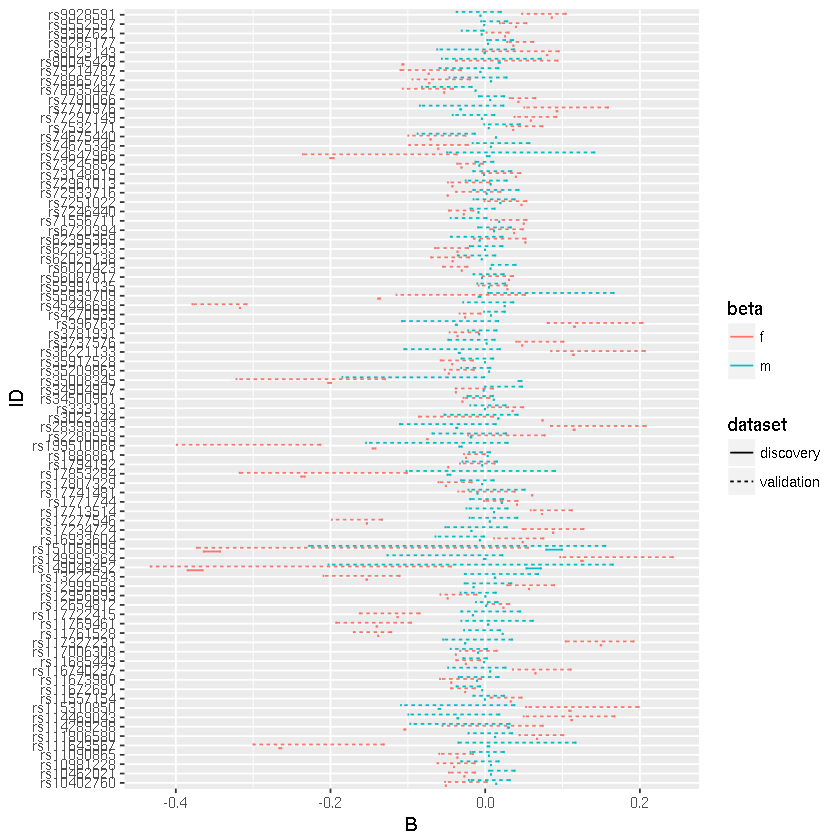

In [118]:
ggplot(res %>% filter(sex=="female"), aes(x=ID, y=B, colour=beta))+
geom_errorbar(aes(ymin=B-1.96*SE, ymax=B+1.96*SE, linetype=dataset), position=position_dodge(0.8)) + coord_flip()

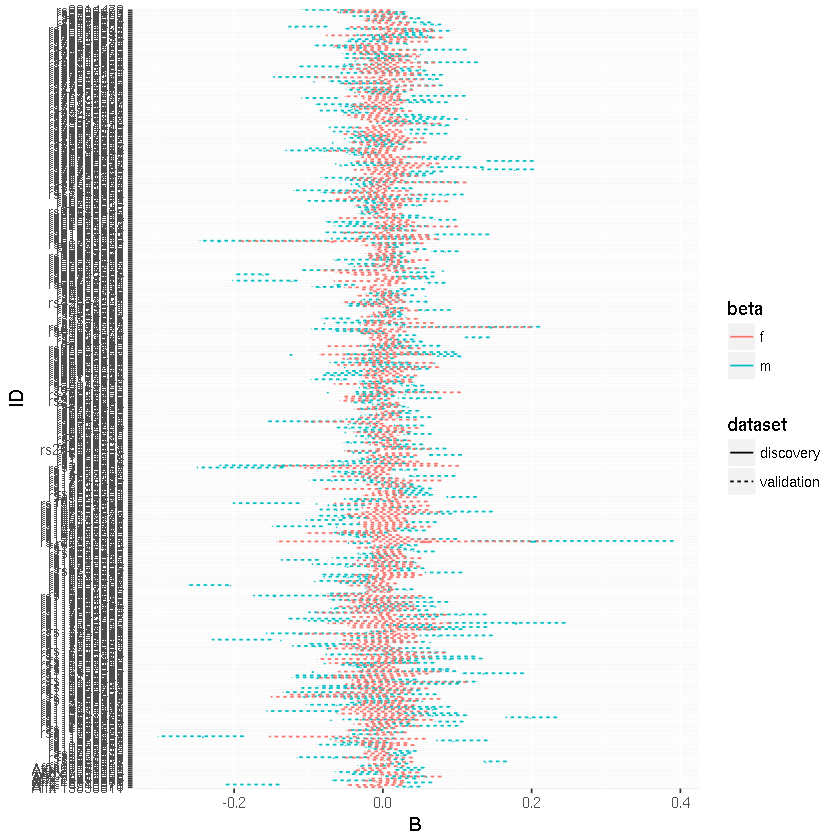

In [119]:
ggplot(res %>% filter(sex=="male"), aes(x=ID, y=B, colour=beta))+
geom_errorbar(aes(ymin=B-1.96*SE, ymax=B+1.96*SE, linetype=dataset), position=position_dodge(0.8)) + coord_flip()

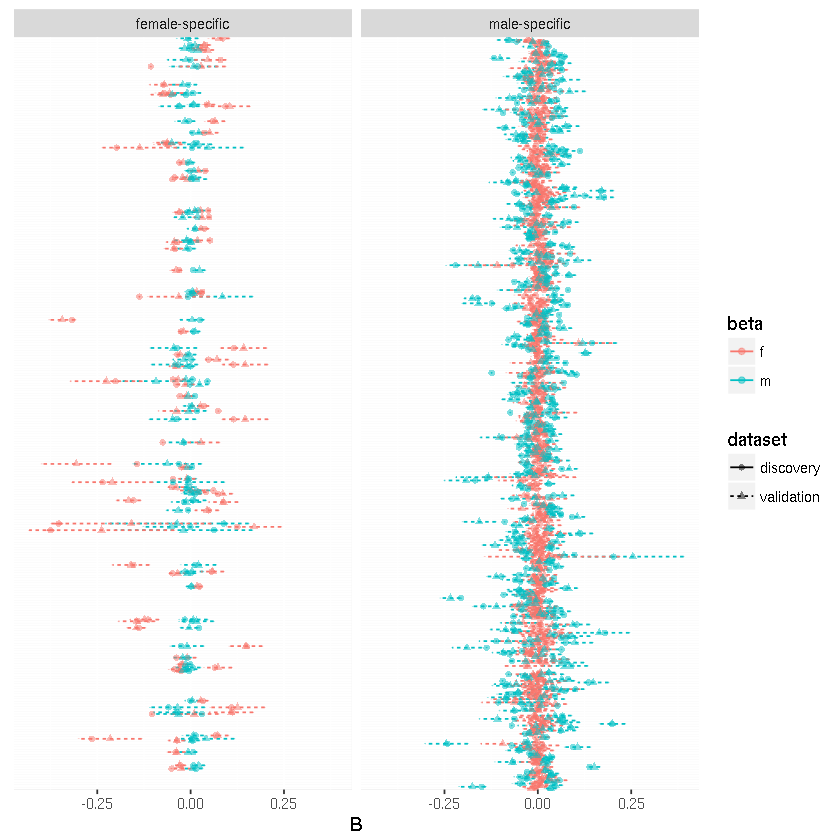

In [133]:
ggplot(res %>% mutate(sex=ifelse(sex=="female", "female-specific", "male-specific")), aes(x=ID, y=B, colour=beta))+
geom_errorbar(aes(ymin=B-1.96*SE, ymax=B+1.96*SE, linetype=dataset), position=position_dodge(0.1))+
geom_point(aes( shape=dataset), alpha=0.5)+
facet_wrap(~sex) +
  theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) +
coord_flip()

In [ ]:
## qqman plot
